In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('sample_data.csv')

### データフレームの最初の5行を表示

In [37]:
df.head()

,ID,Name,Age,City,Sales
0,1,山崎 淳,29,Nagoya,246
1,2,渡辺 翔太,37,Fukuoka,360
2,3,藤井 直子,27,Fukuoka,452
3,4,阿部 あすか,40,Fukuoka,526
4,5,山崎 稔,44,Sapporo,438


### データフレームの基本情報を表示

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      100 non-null    int64 
 1   Name    100 non-null    object
 2   Age     100 non-null    int64 
 3   City    100 non-null    object
 4   Sales   100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


### 基本統計量を表示

In [39]:
df.describe()

,ID,Age,Sales
count,100.000000,100.000000,100.000000
mean,50.500000,41.140000,411.720000
std,29.011492,13.358325,195.622915
min,1.000000,21.000000,103.000000
25%,25.750000,30.000000,269.250000
50%,50.500000,39.500000,368.000000
75%,75.250000,52.250000,536.500000
max,100.000000,65.000000,986.000000


### 都市ごとの平均売上を計算

In [40]:
df.groupby('City')['Sales'].mean()

City
Fukuoka     334.823529
Nagoya      429.950000
Osaka       438.687500
Sapporo     427.466667
Tokyo       423.312500
Yokohama    417.312500
Name: Sales, dtype: float64

## データ可視化

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定 (環境に応じてフォント名を変更してください)
plt.rcParams['font.family'] = 'Meiryo'

### 1. 都市ごとの売上 (棒グラフ)

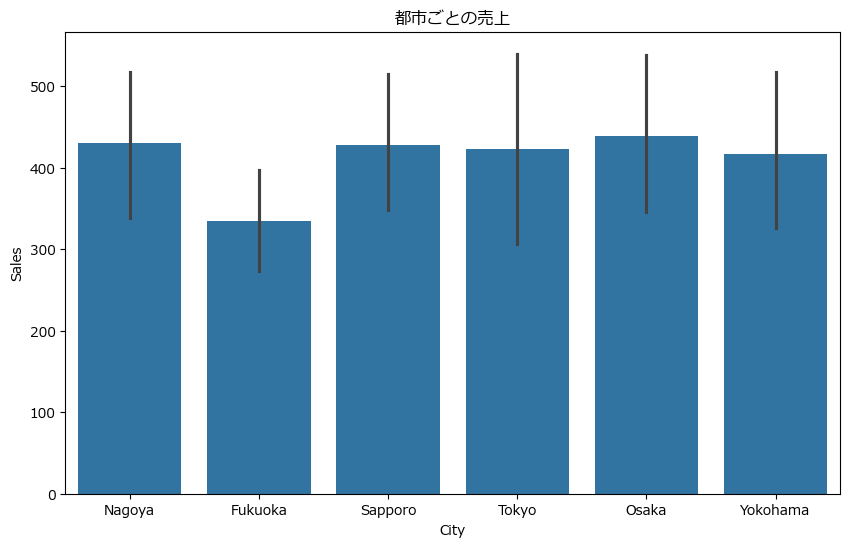

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Sales', data=df)
plt.title('都市ごとの売上')
plt.show()

### 2. 年齢の分布 (ヒストグラム)

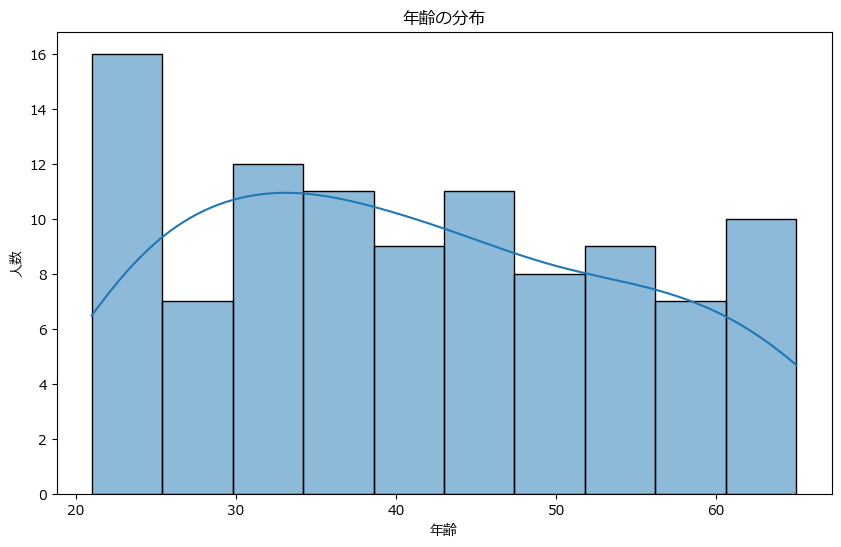

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('年齢の分布')
plt.xlabel('年齢')
plt.ylabel('人数')
plt.show()

### 3. 年齢と売上の関係 (散布図)

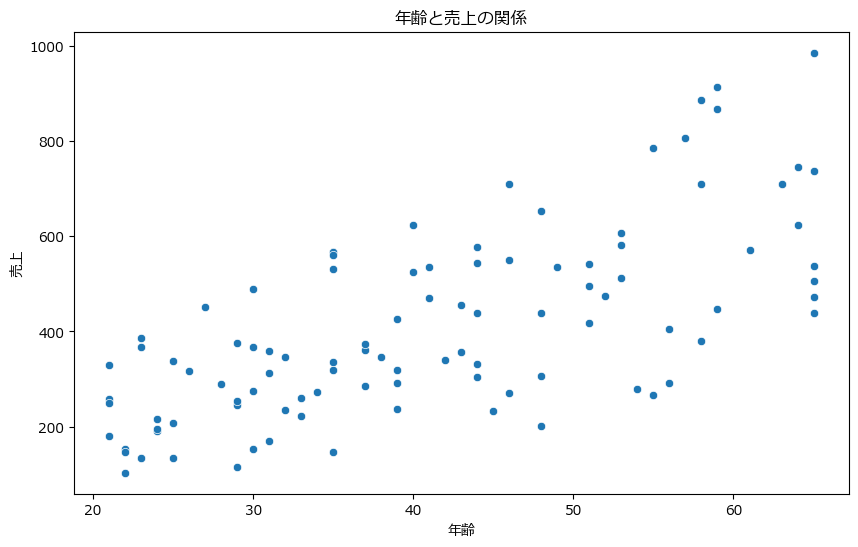

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sales', data=df)
plt.title('年齢と売上の関係')
plt.xlabel('年齢')
plt.ylabel('売上')
plt.show()

## 簡単な機械学習 (線形回帰)

### 1. データの前処理

In [45]:
# カテゴリ変数であるCityをOne-Hotエンコーディング
df_encoded = pd.get_dummies(df, columns=['City'], drop_first=True)
df_encoded.head()

,ID,Name,Age,Sales,City_Nagoya,City_Osaka,City_Sapporo,City_Tokyo,City_Yokohama
0,1,山崎 淳,29,246,True,False,False,False,False
1,2,渡辺 翔太,37,360,False,False,False,False,False
2,3,藤井 直子,27,452,False,False,False,False,False
3,4,阿部 あすか,40,526,False,False,False,False,False
4,5,山崎 稔,44,438,False,False,True,False,False


### 2. 訓練データとテストデータの分割

In [46]:
from sklearn.model_selection import train_test_split

# 特徴量 (X) とターゲット (y) を定義
X = df_encoded.drop(['ID', 'Name', 'Sales'], axis=1)
y = df_encoded['Sales']

# データを8:2の割合で訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. モデルの学習

In [47]:
from sklearn.linear_model import LinearRegression

# 線形回帰モデルのインスタンスを作成
model = LinearRegression()

# モデルを訓練データに適合させる
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4. モデルの評価

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# テストデータで予測を実行
y_pred = model.predict(X_test)

# 評価指標を計算
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'平均二乗誤差 (MSE): {mse:.2f}')
print(f'決定係数 (R^2): {r2:.2f}')

平均二乗誤差 (MSE): 13684.74
決定係数 (R^2): 0.63


### 予測結果の可視化

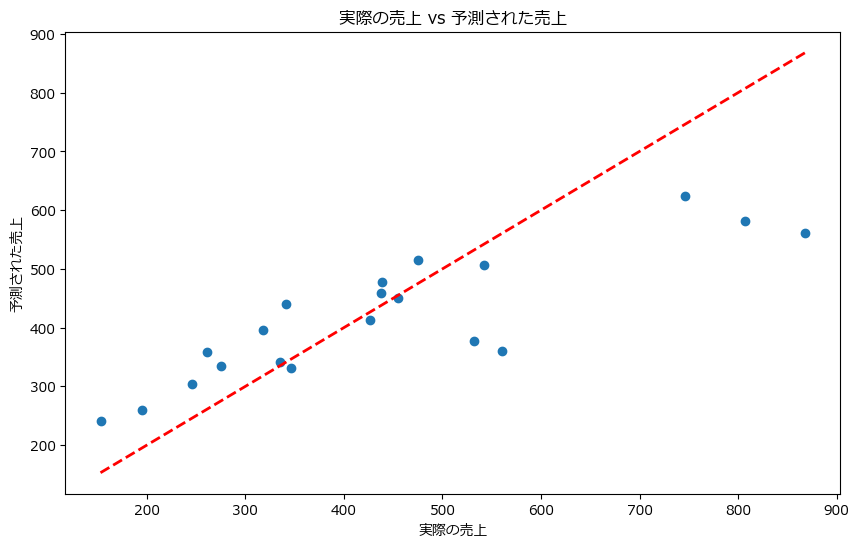

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('実際の売上')
plt.ylabel('予測された売上')
plt.title('実際の売上 vs 予測された売上')
# 理想的な予測を示す対角線を追加
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()